## Generating clean dataframe

In [1]:
import pandas as pd
df = pd.read_csv('../data/padel_results_loop.csv')
df.head()

,Original_Name,Original_SMILES,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,sulphasalazine,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,1,-1.6366,2.678460,20.9255,52.325102,18,18,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,moxalactam,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,4,-1.8532,3.434350,84.1596,65.253860,11,11,56,...,0.726012,0.202821,0.515082,0.311531,0.404004,22.493883,107.951242,249.714723,0.589017,1.230617
2,clioquinol,Oc1c(I)cc(Cl)c2cccnc12,0,1.7041,2.903957,22.1264,28.605965,10,11,18,...,0.636046,0.348308,0.488440,0.490672,0.207540,7.749546,14.229627,23.592414,0.476530,1.186652
3,bbcpd11 (cimetidine analog) (y-g13),CCNC(=NCCSCc1ncccc1Br)NC#N,0,1.3081,1.711126,58.1882,43.238688,6,6,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,schembl614298,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,1,-2.3618,5.578099,88.3588,66.801411,6,6,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(9584, 1877)

In [21]:
rows_missing_df = df[df.isnull().any(axis=1)]
print(rows_missing_df)


                            Original_Name  \
0                          sulphasalazine   
3     bbcpd11 (cimetidine analog) (y-g13)   
4                           schembl614298   
6                  morphine-6-glucuronide   
7                          nitrofurantoin   
...                                   ...   
9576                            zimeldine   
9580    ademetionine(adenosyl-methionine)   
9581                             mesocarb   
9582                           tofisoline   
9583                        azidamfenicol   

                                        Original_SMILES  nAcid   ALogP  \
0      O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O      1 -1.6366   
3                            CCNC(=NCCSCc1ncccc1Br)NC#N      0  1.3081   
4     CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...      1 -2.3618   
6     CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](OC2O[C@H]...      1 -2.3618   
7             O=C1CN(/N=C/c2ccc([N+](=O)[O-])o2)C(=O)N1      0 -0.4812   
...            

In [22]:
rows_with_missing = df.isna().any(axis=1).sum()
print("Rows with missing values:", rows_with_missing)



Rows with missing values: 3272


In [23]:
clean_df = df.dropna(axis=0,)    
clean_df.shape

(6312, 1877)

In [30]:
clean_df.rename(columns={'Original_SMILES':'smiles'}, inplace=True)
clean_df

/var/folders/sr/wdjmxmbx5lz8mb2nqmnbfvqm0000gp/T/ipykernel_73075/1140481586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.rename(columns={'Original_SMILES':'smiles'}, inplace=True)


,Original_Name,smiles,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
1,moxalactam,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,4,-1.8532,3.434350,84.1596,65.253860,11,11,56,...,0.726012,0.202821,0.515082,0.311531,0.404004,22.493883,107.951242,249.714723,0.589017,1.230617
2,clioquinol,Oc1c(I)cc(Cl)c2cccnc12,0,1.7041,2.903957,22.1264,28.605965,10,11,18,...,0.636046,0.348308,0.488440,0.490672,0.207540,7.749546,14.229627,23.592414,0.476530,1.186652
5,"uk-240,455",CS(=O)(=O)N(CCO)c1c(Cl)c(Cl)cc2[nH]c(=O)c(=O)[...,0,-1.0523,1.107335,54.9415,41.264723,6,11,33,...,0.593743,0.304769,0.585940,0.486829,0.291021,11.609978,36.682528,77.031924,0.390615,1.363790
8,"l-701,324",O=c1[nH]c2cc(Cl)ccc2c(O)c1-c1cccc(Oc2ccccc2)c1,0,-0.5049,0.254924,17.2408,51.981102,18,24,40,...,0.884187,0.086784,0.528627,0.533905,0.519028,23.901180,59.936899,114.251776,0.826281,1.581560
10,icotidine,COc1cccnc1CCCCNc1ncc(Cc2ccc(C)nc2)c(=O)[nH]1,0,-0.5201,0.270504,43.3780,60.733825,12,18,53,...,0.825394,0.137564,0.632738,0.490041,0.402539,35.819782,191.450811,420.570685,0.738091,1.525318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9574,xanomeline,C(OC1=NSN=C1C2=CCCN(C2)C)CCCCC,0,-0.4141,0.171479,74.2319,46.978239,5,5,42,...,0.682468,0.248147,0.506367,0.371147,0.344447,15.605274,56.965977,117.226098,0.523702,1.221961
9575,zaleplon,C2=N[N]1C(=CC=NC1=C2C#N)C3=CC(=CC=C3)N(C(C)=O)CC,0,0.6641,0.441029,92.8289,46.223895,15,16,38,...,0.797113,0.129740,0.547931,0.390597,0.300298,17.383025,51.735648,108.853106,0.695670,1.238826
9577,zomebazam,C3=C(N2C1=C([N](C)N=C1C)N(C(=O)CC2=O)C)C=CC=C3,0,-0.1258,0.015826,83.7217,43.072688,11,11,37,...,0.602056,0.290070,0.500983,0.491839,0.397837,11.828007,37.895949,80.897747,0.403084,1.390658
9578,zometapine,C3=C(C1=NCCN=C2N(NC(=C12)C)C)C=CC=C3Cl,0,0.5159,0.266153,81.9598,41.221895,6,6,34,...,0.553319,0.336731,0.456428,0.447273,0.419807,11.159667,35.391315,75.022207,0.335076,1.323508


In [29]:
#appending BBB column to cleaned dataframe
bbb_df = pd.read_csv('../data/combined_bbb_classification_fixed.csv')
bbb_df = bbb_df[['smiles','BBB']]
bbb_df

,smiles,BBB
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,0
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,0
2,Oc1c(I)cc(Cl)c2cccnc12,0
3,CCNC(=NCCSCc1ncccc1Br)NC#N,0
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,0
...,...,...
9632,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,1
9633,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,1
9634,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,1
9635,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,1


In [34]:
clean_df['BBB'] = None
for i in clean_df.index:
    smile = clean_df.at[i,'smiles']
    bbb_value = bbb_df.loc[bbb_df['smiles'] == smile, 'BBB']
    if not bbb_value.empty:
        clean_df.at[i, 'BBB'] = int(bbb_value.values[0])
    else:
        clean_df.at[i, 'BBB'] = None
    
clean_df

/var/folders/sr/wdjmxmbx5lz8mb2nqmnbfvqm0000gp/T/ipykernel_73075/2193788045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['BBB'] = None


,Original_Name,smiles,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds,BBB
1,moxalactam,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,4,-1.8532,3.434350,84.1596,65.253860,11,11,56,...,0.202821,0.515082,0.311531,0.404004,22.493883,107.951242,249.714723,0.589017,1.230617,0
2,clioquinol,Oc1c(I)cc(Cl)c2cccnc12,0,1.7041,2.903957,22.1264,28.605965,10,11,18,...,0.348308,0.488440,0.490672,0.207540,7.749546,14.229627,23.592414,0.476530,1.186652,0
5,"uk-240,455",CS(=O)(=O)N(CCO)c1c(Cl)c(Cl)cc2[nH]c(=O)c(=O)[...,0,-1.0523,1.107335,54.9415,41.264723,6,11,33,...,0.304769,0.585940,0.486829,0.291021,11.609978,36.682528,77.031924,0.390615,1.363790,0
8,"l-701,324",O=c1[nH]c2cc(Cl)ccc2c(O)c1-c1cccc(Oc2ccccc2)c1,0,-0.5049,0.254924,17.2408,51.981102,18,24,40,...,0.086784,0.528627,0.533905,0.519028,23.901180,59.936899,114.251776,0.826281,1.581560,0
10,icotidine,COc1cccnc1CCCCNc1ncc(Cc2ccc(C)nc2)c(=O)[nH]1,0,-0.5201,0.270504,43.3780,60.733825,12,18,53,...,0.137564,0.632738,0.490041,0.402539,35.819782,191.450811,420.570685,0.738091,1.525318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9574,xanomeline,C(OC1=NSN=C1C2=CCCN(C2)C)CCCCC,0,-0.4141,0.171479,74.2319,46.978239,5,5,42,...,0.248147,0.506367,0.371147,0.344447,15.605274,56.965977,117.226098,0.523702,1.221961,1
9575,zaleplon,C2=N[N]1C(=CC=NC1=C2C#N)C3=CC(=CC=C3)N(C(C)=O)CC,0,0.6641,0.441029,92.8289,46.223895,15,16,38,...,0.129740,0.547931,0.390597,0.300298,17.383025,51.735648,108.853106,0.695670,1.238826,1
9577,zomebazam,C3=C(N2C1=C([N](C)N=C1C)N(C(=O)CC2=O)C)C=CC=C3,0,-0.1258,0.015826,83.7217,43.072688,11,11,37,...,0.290070,0.500983,0.491839,0.397837,11.828007,37.895949,80.897747,0.403084,1.390658,1
9578,zometapine,C3=C(C1=NCCN=C2N(NC(=C12)C)C)C=CC=C3Cl,0,0.5159,0.266153,81.9598,41.221895,6,6,34,...,0.336731,0.456428,0.447273,0.419807,11.159667,35.391315,75.022207,0.335076,1.323508,1


In [36]:
clean_df['BBB'].value_counts()

BBB
1    4568
0    1744
Name: count, dtype: int64

In [38]:
clean_df.to_csv('../data/padel_results_with_bbb.csv', index=False)

## Creating models


In [2]:
# Import required libraries for modeling and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, matthews_corrcoef, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')

print('All libraries imported successfully!')

All libraries imported successfully!


In [3]:
# Load the PADEL descriptors dataset with BBB values
try:
    padel_df = pd.read_csv('../data/padel_results_with_bbb.csv')
    print(f'Dataset shape: {padel_df.shape}')
    print(f'\nFirst few rows:')
    print(padel_df.head())
    print(f'\nColumn names (first 10):')
    print(padel_df.columns[:10].tolist())
except Exception as e:
    print(f'Error loading data: {e}')

Dataset shape: (6312, 1878)

First few rows:
  Original_Name                                             smiles  nAcid  \
0    moxalactam  COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...      4   
1    clioquinol                             Oc1c(I)cc(Cl)c2cccnc12      0   
2    uk-240,455  CS(=O)(=O)N(CCO)c1c(Cl)c(Cl)cc2[nH]c(=O)c(=O)[...      0   
3     l-701,324     O=c1[nH]c2cc(Cl)ccc2c(O)c1-c1cccc(Oc2ccccc2)c1      0   
4     icotidine       COc1cccnc1CCCCNc1ncc(Cc2ccc(C)nc2)c(=O)[nH]1      0   

    ALogP    ALogp2      AMR       apol  naAromAtom  nAromBond  nAtom  ...  \
0 -1.8532  3.434350  84.1596  65.253860          11         11     56  ...   
1  1.7041  2.903957  22.1264  28.605965          10         11     18  ...   
2 -1.0523  1.107335  54.9415  41.264723           6         11     33  ...   
3 -0.5049  0.254924  17.2408  51.981102          18         24     40  ...   
4 -0.5201  0.270504  43.3780  60.733825          12         18     53  ...   

        P2s       E1s  

In [4]:
try:
    # Check for missing values
    print(f'Missing values in dataset:')
    print(padel_df.isna().sum())
    
    # Drop rows with missing BBB values
    padel_df_clean = padel_df.dropna(subset=['BBB']).copy()
    print(f'\nDataset shape after dropping missing BBB: {padel_df_clean.shape}')
    
    # Drop non-descriptor columns (Original_Name and smiles)
    # Descriptors start from 'nAcid' onwards
    descriptor_start_idx = padel_df_clean.columns.tolist().index('nAcid')
    descriptor_cols = padel_df_clean.columns[descriptor_start_idx:-1].tolist()  # Exclude BBB column
    
    print(f'\nNumber of descriptors: {len(descriptor_cols)}')
    print(f'First 10 descriptors: {descriptor_cols[:10]}')
    print(f'Last 10 descriptors: {descriptor_cols[-10:]}')
    
    # Check BBB distribution
    print(f'\nBBB value distribution:')
    print(padel_df_clean['BBB'].value_counts().sort_index())
    
except Exception as e:
    print(f'Error in data preparation: {e}')

Missing values in dataset:
Original_Name    0
smiles           0
nAcid            0
ALogP            0
ALogp2           0
                ..
As               0
Vs               0
Ks               0
Ds               0
BBB              0
Length: 1878, dtype: int64

Dataset shape after dropping missing BBB: (6312, 1878)

Number of descriptors: 1875
First 10 descriptors: ['nAcid', 'ALogP', 'ALogp2', 'AMR', 'apol', 'naAromAtom', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nH']
Last 10 descriptors: ['P1s', 'P2s', 'E1s', 'E2s', 'E3s', 'Ts', 'As', 'Vs', 'Ks', 'Ds']

BBB value distribution:
BBB
0    1744
1    4568
Name: count, dtype: int64


In [5]:
try:
    # Fill any remaining missing values with zero in descriptor columns
    X = padel_df_clean[descriptor_cols].fillna(0)
    y = padel_df_clean['BBB']
    
    print(f'Feature matrix shape: {X.shape}')
    print(f'Target vector shape: {y.shape}')
    print(f'\nMissing values after filling:')
    print(X.isna().sum().sum())
    
    # Standardize the features (important for distance-based algorithms like KNN and SVM)
    # scaler = StandardScaler()
    # X_scaled = scaler.fit_transform(X)
    
    import joblib
    scaler = joblib.load("../output/models/scaler_padel.pkl")
    X_scaled = scaler.transform(X)
    
    # Create a DataFrame with scaled features for easier manipulation
    X_scaled_df = pd.DataFrame(X_scaled, columns=descriptor_cols, index=X.index)
    
    print(f'\nScaled features shape: {X_scaled_df.shape}')
    print(f'Scaled features - mean close to 0: {X_scaled_df.mean().mean():.6f}')
    print(f'Scaled features - std close to 1: {X_scaled_df.std().mean():.6f}')
    
except Exception as e:
    print(f'Error in feature standardization: {e}')

Feature matrix shape: (6312, 1875)
Target vector shape: (6312,)

Missing values after filling:
0

Scaled features shape: (6312, 1875)
Scaled features - mean close to 0: -0.000000
Scaled features - std close to 1: 0.884870
Scaled features - std close to 1: 0.884870


In [36]:
import joblib

# Save the scaler used for PaDEL descriptors
joblib.dump(scaler, '../output/models/scaler_padel.pkl')


['../output/models/scaler_padel.pkl']

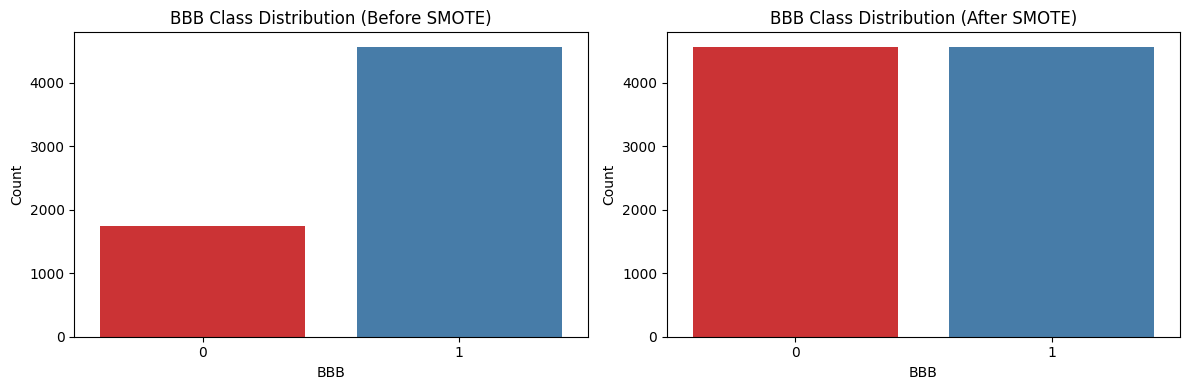

Balanced dataset shape: (9136, 1876)

Balanced BBB distribution:
BBB
0    4568
1    4568
Name: count, dtype: int64


In [6]:
try:
    # Plot class imbalance before balancing
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Before SMOTE
    sns.countplot(x='BBB', data=pd.DataFrame({'BBB': y}), palette='Set1', ax=axes[0])
    axes[0].set_title('BBB Class Distribution (Before SMOTE)')
    axes[0].set_ylabel('Count')
    
    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_scaled_df, y)
    
    # After SMOTE
    sns.countplot(x='BBB', data=pd.DataFrame({'BBB': y_res}), palette='Set1', ax=axes[1])
    axes[1].set_title('BBB Class Distribution (After SMOTE)')
    axes[1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.savefig('../figures/padel_class_distribution_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Create balanced DataFrame
    balanced_padel_df = pd.DataFrame(X_res, columns=descriptor_cols)
    balanced_padel_df['BBB'] = y_res.values
    
    print(f'Balanced dataset shape: {balanced_padel_df.shape}')
    print(f'\nBalanced BBB distribution:')
    print(balanced_padel_df['BBB'].value_counts().sort_index())
    
except Exception as e:
    print(f'Error in class balancing: {e}')

In [7]:
try:
    # Split balanced data into train and test sets (80-20 split)
    train_padel_df, test_padel_df = train_test_split(
        balanced_padel_df, 
        test_size=0.2, 
        random_state=42,
        stratify=balanced_padel_df['BBB']  # Ensure balanced split
    )
    
    print(f'Training set shape: {train_padel_df.shape}')
    print(f'Test set shape: {test_padel_df.shape}')
    print(f'\nTraining set BBB distribution:')
    print(train_padel_df['BBB'].value_counts().sort_index())
    print(f'\nTest set BBB distribution:')
    print(test_padel_df['BBB'].value_counts().sort_index())
    
except Exception as e:
    print(f'Error in data splitting: {e}')

Training set shape: (7308, 1876)
Test set shape: (1828, 1876)

Training set BBB distribution:
BBB
0    3654
1    3654
Name: count, dtype: int64

Test set BBB distribution:
BBB
0    914
1    914
Name: count, dtype: int64


In [8]:
try:
    # First, try to import LazyPredict; if not available, install it
    try:
        from lazypredict.Supervised import LazyClassifier
    except ImportError:
        import subprocess
        print('Installing lazypredict...')
        subprocess.check_call(['pip', 'install', 'lazypredict'])
        from lazypredict.Supervised import LazyClassifier
    
    print('LazyPredict imported successfully!')
    
except Exception as e:
    print(f'Error with LazyPredict setup: {e}')

LazyPredict imported successfully!


In [9]:
try:
    # Function to run lazy classifier
    def run_lazy_classifier_padel(data):
        """
        Run LazyPredict on the PADEL data to identify promising models.
        
        Design Choice: Using LazyPredict for initial model screening allows us to:
        1. Quickly benchmark multiple algorithms without manual tuning
        2. Identify which model families (tree-based, linear, distance-based) work best
        3. Focus hyperparameter tuning on the most promising candidates
        """
        X = data.drop(columns='BBB')
        y = data['BBB']
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print('Running LazyPredict classification...')
        print('This may take a few minutes...\n')
        
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
        models, predictions = clf.fit(X_train, X_test, y_train, y_test)
        
        return models.sort_values('Accuracy', ascending=False)
    
    # Run LazyPredict
    lazy_results = run_lazy_classifier_padel(train_padel_df)
    print('\n=== LazyPredict Results (Top 10 Models by Accuracy) ===')
    print(lazy_results.head(10))
    
except Exception as e:
    print(f'Error running LazyPredict: {e}')
    print('This is expected if lazypredict has dependency issues.')
    print('We will proceed with selected models anyway.')

Running LazyPredict classification...
This may take a few minutes...



  0%|          | 0/32 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [14]:
from lightgbm import LGBMClassifier


In [24]:

try:
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix, matthews_corrcoef
    import joblib
    import pandas as pd

    print('Pipeline and GridSearchCV imported!')

    # Model definitions and grids
    model_grids = [
        # KNN
        ('KNN', Pipeline([
            ('scaler', StandardScaler()),
            ('clf', KNeighborsClassifier())
        ]), {
            'clf__n_neighbors': [3, 5, 7],
            'clf__weights': ['uniform', 'distance'],
            'clf__metric': ['euclidean', 'manhattan']
        }),
        # Logistic Regression
        ('LR', Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(max_iter=1000, random_state=42))
        ]), {
            'clf__C': [0.1, 1, 10],
            'clf__penalty': ['l2']
        }),
        # Random Forest
        ('RF', RandomForestClassifier(random_state=42), {
            'n_estimators': [100, 200],
            'max_depth': [8, 16],
            'min_samples_split': [2, 5]
        }),
        # Extra Trees
        ('ET', ExtraTreesClassifier(random_state=42), {
            'n_estimators': [100, 200],
            'max_depth': [8, 16],
            'min_samples_split': [2, 5]
        }),
        # LightGBM
        ('LGBM', LGBMClassifier(random_state=42), {
            'n_estimators': [100, 200],
            'num_leaves': [31, 63],
            'learning_rate': [0.05, 0.1]
        })
    ]

    # Prepare data
    X_train = train_padel_df.drop(columns='BBB')
    y_train = train_padel_df['BBB']

    best_models = {}
    best_params = {}
    best_scores = {}
    metrics_results = []

    for name, model, param_grid in model_grids:
        print(f'\n--- Tuning {name} ---')
        gs = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
        gs.fit(X_train, y_train)
        print(f'Best params for {name}: {gs.best_params_}')
        print(f'Best Accuracy (CV): {gs.best_score_:.4f}')
        best_models[name] = gs.best_estimator_
        best_params[name] = gs.best_params_
        best_scores[name] = gs.best_score_

    # Retrain best models on full training data, save, and calculate metrics
    for name, model in best_models.items():

        # Using cross_val_predict for HONEST metrics
        # This simulates "unseen" data for the report card
        y_pred = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=1)
        
        # Handle probabilities for AUC
        if hasattr(model, "predict_proba"):
            # For pipelines, we need to access the probability method carefully or use cross_val_predict method
            try:
                y_proba = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba', n_jobs=1)[:, 1]
            except:
                # Fallback if method fails (rare)
                y_proba = [0] * len(y_train)
        else:
             y_proba = [0] * len(y_train)

        # Calculate Metrics based on the CROSS-VALIDATED predictions
        cm = confusion_matrix(y_train, y_pred)
        TN, FP, FN, TP = cm.ravel()
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

        metrics_results.append({
            'Model': name,
            'Accuracy': accuracy_score(y_train, y_pred),
            'Precision': precision_score(y_train, y_pred),
            'Recall': recall_score(y_train, y_pred),
            'Specificity': specificity,
            'F1 Score': f1_score(y_train, y_pred),
            'roc_auc': roc_auc_score(y_train, y_proba) if len(set(y_train)) > 1 else 0,
            'BestParams': str(best_params[name]) # Convert dict to string for CSV safety
        })

        # Final Step: Retrain on 100% data for saving (Production Ready)
        print(f'Retraining {name} on full dataset for saving...')
        model.fit(X_train, y_train)
        joblib.dump(model, f'../output/models/padel_{name}_model.pkl')

    # Save metrics to CSV
    metrics_df = pd.DataFrame(metrics_results)
    # Reorder columns for readability
    cols = ['Model', 'Accuracy', 'F1 Score', 'roc_auc', 'Precision', 'Recall', 'Specificity', 'BestParams']
    metrics_df = metrics_df[cols]
    
    metrics_df.to_csv('../output/models/padel_train_metrics_summary.csv', index=False)
    
    print('\nAll models tuned, retrained, and saved!')
    display(metrics_df)
except Exception as e:
    print(f'Error in refactored model training pipeline: {e}')


Pipeline and GridSearchCV imported!

--- Tuning KNN ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits

--- Tuning KNN ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params for KNN: {'clf__metric': 'manhattan', 'clf__n_neighbors': 3, 'clf__weights': 'distance'}
Best Accuracy (CV): 0.9271

--- Tuning LR ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params for KNN: {'clf__metric': 'manhattan', 'clf__n_neighbors': 3, 'clf__weights': 'distance'}
Best Accuracy (CV): 0.9271

--- Tuning LR ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params for LR: {'clf__C': 10, 'clf__penalty': 'l2'}
Best Accuracy (CV): 0.9024

--- Tuning RF ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params for LR: {'clf__C': 10, 'clf__penalty': 'l2'}
Best Accuracy (CV): 0.9024

--- Tuning RF ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params for RF: {'max_depth': 16, 'min_samples_split': 2, 

,Model,Accuracy,F1 Score,roc_auc,Precision,Recall,Specificity,BestParams
0,KNN,0.93,0.93,0.96,0.95,0.91,0.95,"{'clf__metric': 'manhattan', 'clf__n_neighbors..."
1,LR,0.90,0.90,0.95,0.92,0.89,0.92,"{'clf__C': 10, 'clf__penalty': 'l2'}"
2,RF,0.93,0.93,0.98,0.92,0.94,0.92,"{'max_depth': 16, 'min_samples_split': 2, 'n_e..."
3,ET,0.93,0.93,0.98,0.93,0.94,0.93,"{'max_depth': 16, 'min_samples_split': 2, 'n_e..."
4,LGBM,0.94,0.94,0.98,0.93,0.94,0.93,"{'learning_rate': 0.05, 'n_estimators': 200, '..."


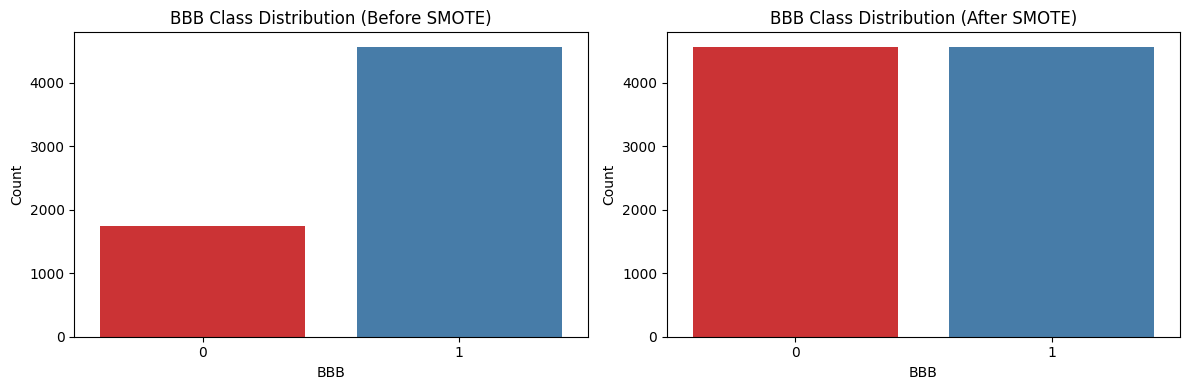

Balanced dataset shape: (9136, 1876)

Balanced BBB distribution:
BBB
0    4568
1    4568
Name: count, dtype: int64


In [ ]:
try:
    # Plot class imbalance before balancing
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Before SMOTE
    sns.countplot(x='BBB', data=pd.DataFrame({'BBB': y}), palette='Set1', ax=axes[0])
    axes[0].set_title('BBB Class Distribution (Before SMOTE)')
    axes[0].set_ylabel('Count')
    
    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_scaled_df, y)
    
    # After SMOTE
    sns.countplot(x='BBB', data=pd.DataFrame({'BBB': y_res}), palette='Set1', ax=axes[1])
    axes[1].set_title('BBB Class Distribution (After SMOTE)')
    axes[1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.savefig('../figures/padel_class_distribution_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Create balanced DataFrame
    balanced_padel_df = pd.DataFrame(X_res, columns=descriptor_cols)
    balanced_padel_df['BBB'] = y_res.values
    
    print(f'Balanced dataset shape: {balanced_padel_df.shape}')
    print(f'\nBalanced BBB distribution:')
    print(balanced_padel_df['BBB'].value_counts().sort_index())
    
except Exception as e:
    print(f'Error in class balancing: {e}')

In [10]:
X_train = train_padel_df.drop(columns='BBB')
y_train = train_padel_df['BBB']

In [11]:
X_test = test_padel_df.drop(columns='BBB')
y_test = test_padel_df['BBB']

In [37]:
print(padel_saved_models)

{'KNN': KNeighborsClassifier(n_neighbors=3), 'SVM': SVC(probability=True, random_state=42), 'RF': RandomForestClassifier(max_depth=8, random_state=42), 'LR': LogisticRegression(max_iter=1000, random_state=42), 'ET': ExtraTreesClassifier(random_state=42), 'LGBM': LGBMClassifier(random_state=42)}


In [ ]:
try:
    print('\n' + '='*80)
    print('EVALUATING OPTIMIZED MODELS ON TEST SET')
    print('='*80)
    
    X_test = test_padel_df.drop(columns='BBB')
    y_test = test_padel_df['BBB']
    
    test_results = []
    test_predictions = pd.DataFrame()
    
    # Evaluate all tuned models 
    all_models = dict(best_models)

    
    for name, model in all_models.items():
        try:
            y_pred = model.predict(X_test)
            if hasattr(model, 'predict_proba'):
                y_proba = model.predict_proba(X_test)[:, 1]
            else:
                y_proba = [0] * len(y_test)
            cm = confusion_matrix(y_test, y_pred)
            TN, FP, FN, TP = cm.ravel()
            specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
            test_results.append({
                'Model': name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Specificity': specificity,
                'F1 Score': f1_score(y_test, y_pred),
                'roc_auc': roc_auc_score(y_test, y_proba),
            })
            test_predictions[name] = y_pred
            test_predictions[f'{name}_proba'] = y_proba
            print(f'✓ {name} evaluated on test set')
        except Exception as e:
            print(f'Error evaluating {name} on test set: {e}')
            continue
    
    # Save test results
    test_results_df = pd.DataFrame(test_results)
    cols = ['Model', 'Accuracy', 'F1 Score', 'roc_auc', 'Precision', 'Recall', 'Specificity']
    test_results_df = test_results_df[cols]
    test_results_df.to_csv('../output/models/padel_test_metrics_summary.csv', index=False)
    print('Test set metrics summary saved to ../output/models/padel_test_metrics_summary.csv')
    display(test_results_df)
    
    # Save predictions
    test_predictions['BBB_actual'] = y_test.values
    test_predictions.to_csv('../output/models/padel_test_predictions.csv', index=False)
    print('Test set predictions saved to ../output/models/padel_test_predictions.csv')
    
    # Provide download links (for Jupyter/Colab)
    from IPython.display import FileLink, display as ipydisplay
    print('Download links:')
    ipydisplay(FileLink('../output/models/padel_train_metrics_summary.csv'))
    ipydisplay(FileLink('../output/models/padel_test_metrics_summary.csv'))
    ipydisplay(FileLink('../output/models/padel_test_predictions.csv'))
    for name in all_models:
        ipydisplay(FileLink(f'../output/models/padel_{name}_model.pkl'))
except Exception as e:
    print(f'Error in test set evaluation and export: {e}')


EVALUATING OPTIMIZED MODELS ON TEST SET
✓ KNN evaluated on test set
✓ LR evaluated on test set
✓ RF evaluated on test set
✓ KNN evaluated on test set
✓ LR evaluated on test set
✓ RF evaluated on test set
✓ ET evaluated on test set
✓ LGBM evaluated on test set
Test set metrics summary saved to ../output/models/padel_test_metrics_summary.csv
✓ ET evaluated on test set
✓ LGBM evaluated on test set
Test set metrics summary saved to ../output/models/padel_test_metrics_summary.csv


,Model,Accuracy,F1 Score,roc_auc,Precision,Recall,Specificity
0,KNN,0.94,0.94,0.97,0.96,0.93,0.96
1,LR,0.92,0.92,0.96,0.94,0.89,0.94
2,RF,0.93,0.93,0.98,0.94,0.93,0.94
3,ET,0.94,0.94,0.98,0.94,0.93,0.94
4,LGBM,0.94,0.94,0.98,0.94,0.94,0.94


Test set predictions saved to ../output/models/padel_test_predictions.csv
Download links:


/Users/soham/Desktop/afr_project/mtoralzml/output/models/padel_train_metrics_summary.csv

/Users/soham/Desktop/afr_project/mtoralzml/output/models/padel_test_metrics_summary.csv

/Users/soham/Desktop/afr_project/mtoralzml/output/models/padel_test_predictions.csv

/Users/soham/Desktop/afr_project/mtoralzml/output/models/padel_KNN_model.pkl

/Users/soham/Desktop/afr_project/mtoralzml/output/models/padel_LR_model.pkl

/Users/soham/Desktop/afr_project/mtoralzml/output/models/padel_RF_model.pkl

/Users/soham/Desktop/afr_project/mtoralzml/output/models/padel_ET_model.pkl

/Users/soham/Desktop/afr_project/mtoralzml/output/models/padel_LGBM_model.pkl

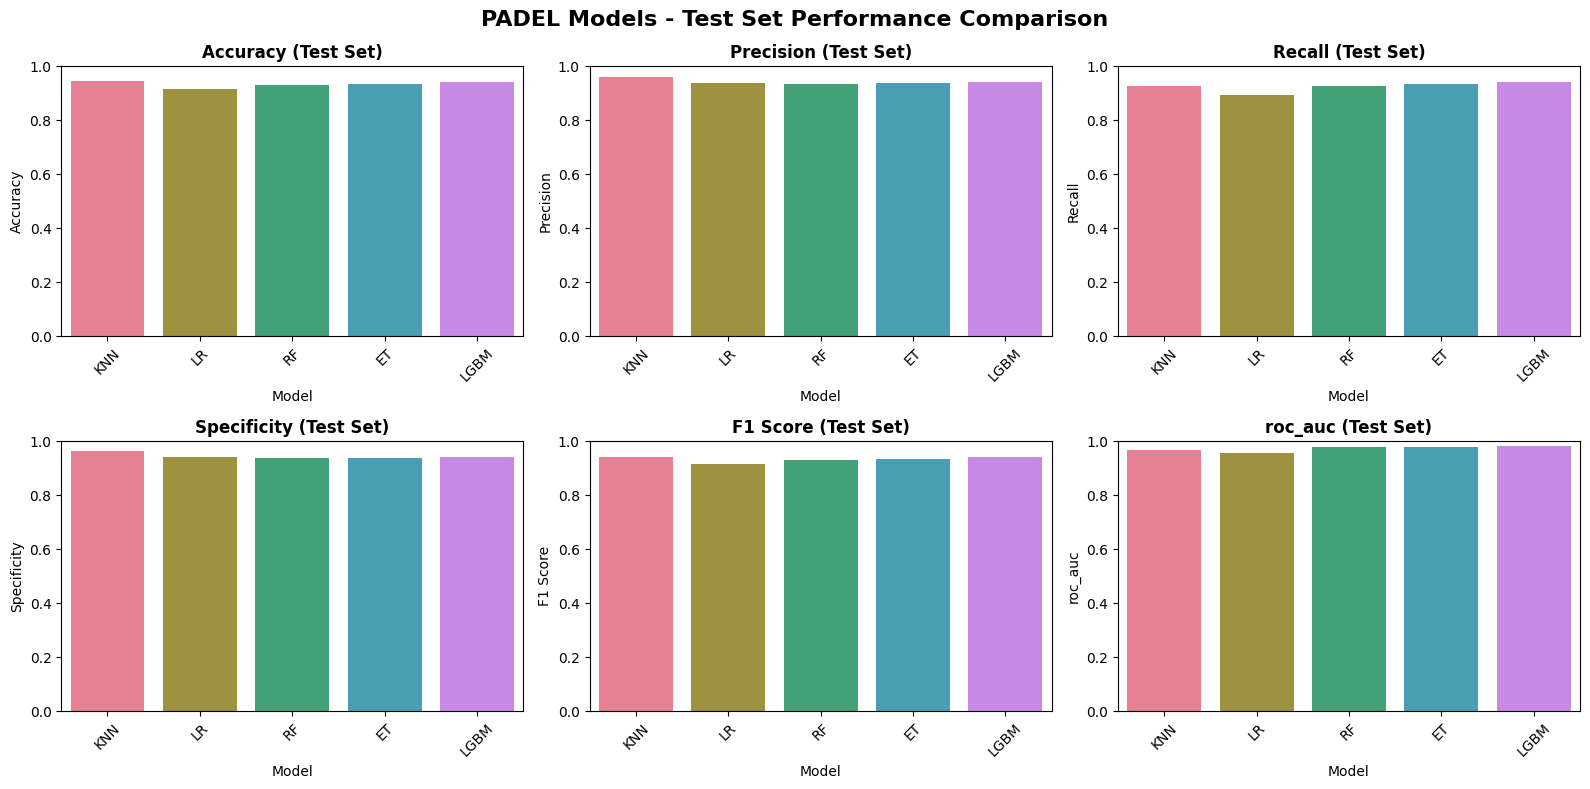

In [31]:
try:
    metrics = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score', 'roc_auc']
    fig, axs = plt.subplots(2, 3, figsize=(16, 8))
    fig.suptitle('PADEL Models - Test Set Performance Comparison', fontsize=16, fontweight='bold')
    for i, metric in enumerate(metrics):
        row = i // 3
        col = i % 3
        sns.barplot(
            x='Model', y=metric, data=test_results_df, 
            palette='husl', ax=axs[row, col]
        )
        axs[row, col].set_title(f'{metric} (Test Set)', fontweight='bold')
        axs[row, col].set_ylim(0, 1)
        axs[row, col].set_ylabel(metric)
        axs[row, col].set_xlabel('Model')
        axs[row, col].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.savefig('../figures/padel_test_metrics_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f'Error visualizing test metrics: {e}')

In [32]:
try:
    print('\n' + '='*80)
    print('PREDICTION ANALYSIS ON BBB CLASSES (TEST SET)')
    print('='*80)
    model_names = list(test_results_df['Model'])
    # BBB Positive cases
    print('\n--- BBB POSITIVE Cases Correctly Predicted by Each Model ---')
    bbb_pos_correct = {}
    total_bbb_pos = (test_predictions['BBB_actual'] == 1).sum()
    print(f'Total BBB positive cases in test set: {total_bbb_pos}')
    for model in model_names:
        correct = ((test_predictions['BBB_actual'] == 1) & (test_predictions[model] == 1)).sum()
        bbb_pos_correct[model] = correct
        percentage = (correct / total_bbb_pos * 100) if total_bbb_pos > 0 else 0
        print(f'{model}: {correct}/{total_bbb_pos} ({percentage:.1f}%)')
    # BBB Negative cases
    print('\n--- BBB NEGATIVE Cases Correctly Predicted by Each Model ---')
    bbb_neg_correct = {}
    total_bbb_neg = (test_predictions['BBB_actual'] == 0).sum()
    print(f'Total BBB negative cases in test set: {total_bbb_neg}')
    for model in model_names:
        correct = ((test_predictions['BBB_actual'] == 0) & (test_predictions[model] == 0)).sum()
        bbb_neg_correct[model] = correct
        percentage = (correct / total_bbb_neg * 100) if total_bbb_neg > 0 else 0
        print(f'{model}: {correct}/{total_bbb_neg} ({percentage:.1f}%)')
except Exception as e:
    print(f'Error in prediction analysis: {e}')


PREDICTION ANALYSIS ON BBB CLASSES (TEST SET)

--- BBB POSITIVE Cases Correctly Predicted by Each Model ---
Total BBB positive cases in test set: 914
KNN: 846/914 (92.6%)
LR: 817/914 (89.4%)
RF: 849/914 (92.9%)
ET: 854/914 (93.4%)
LGBM: 861/914 (94.2%)

--- BBB NEGATIVE Cases Correctly Predicted by Each Model ---
Total BBB negative cases in test set: 914
KNN: 880/914 (96.3%)
LR: 860/914 (94.1%)
RF: 856/914 (93.7%)
ET: 857/914 (93.8%)
LGBM: 862/914 (94.3%)



FEATURE IMPORTANCE ANALYSIS

Computing feature importance using sample data (2192 samples)...

Analyzing RF...
  Using built-in feature importance

Computing feature importance using sample data (2192 samples)...

Analyzing RF...
  Using built-in feature importance


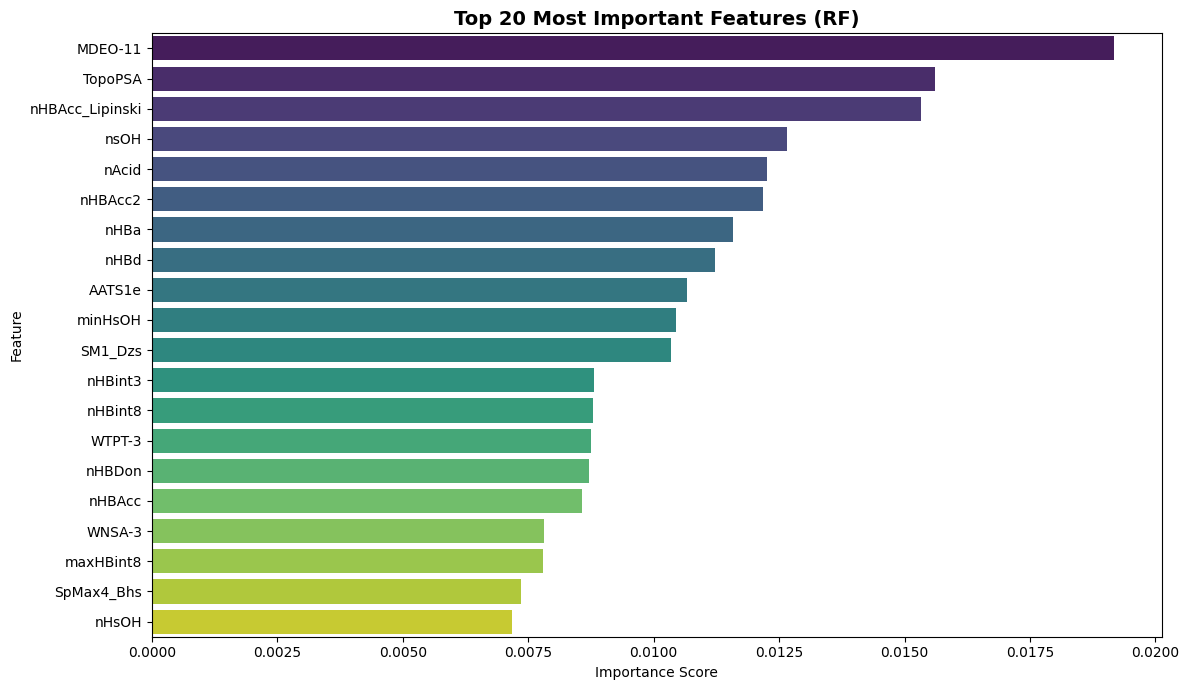


  Top 5 features for RF:
              Feature  Importance
1264          MDEO-11        0.02
1410          TopoPSA        0.02
1200  nHBAcc_Lipinski        0.02
729              nsOH        0.01
0               nAcid        0.01

Analyzing LR...
  Using absolute coefficient values


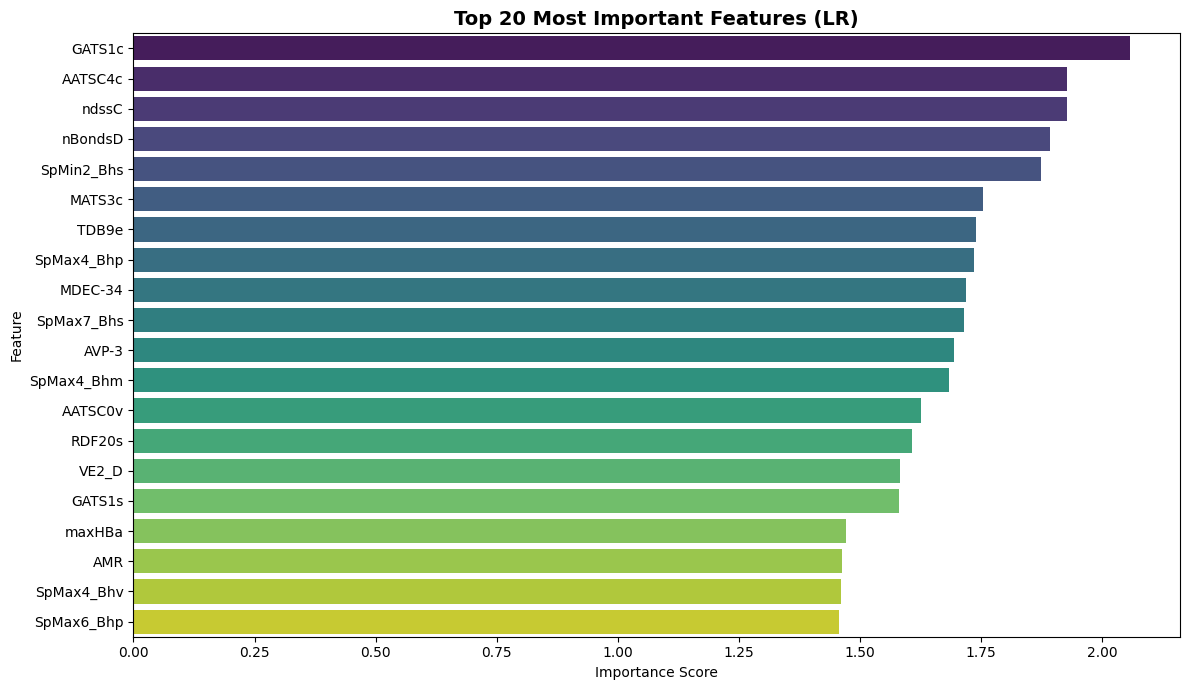


  Top 5 features for LR:
        Feature  Importance
311      GATS1c        2.06
196     AATSC4c        1.93
711       ndssC        1.93
470     nBondsD        1.89
565  SpMin2_Bhs        1.87

Analyzing ET...
  Using built-in feature importance


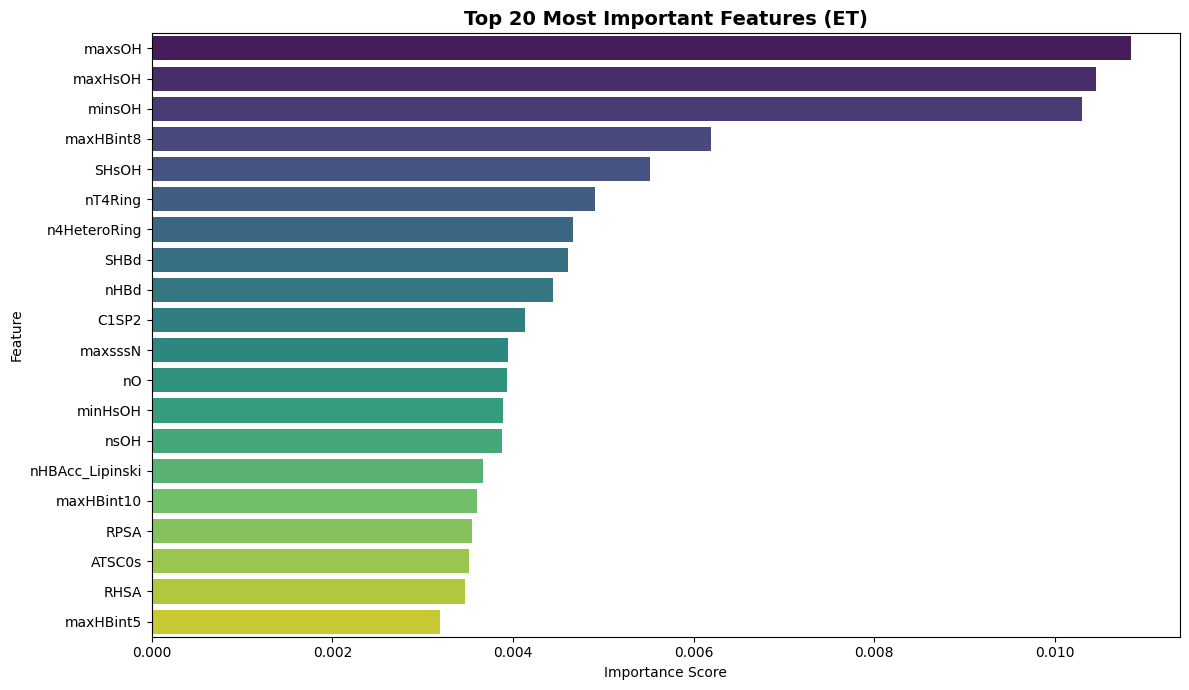


  Top 5 features for ET:
        Feature  Importance
1086     maxsOH        0.01
1033    maxHsOH        0.01
967      minsOH        0.01
1030  maxHBint8        0.01
795       SHsOH        0.01

Analyzing LGBM...
  Using built-in feature importance


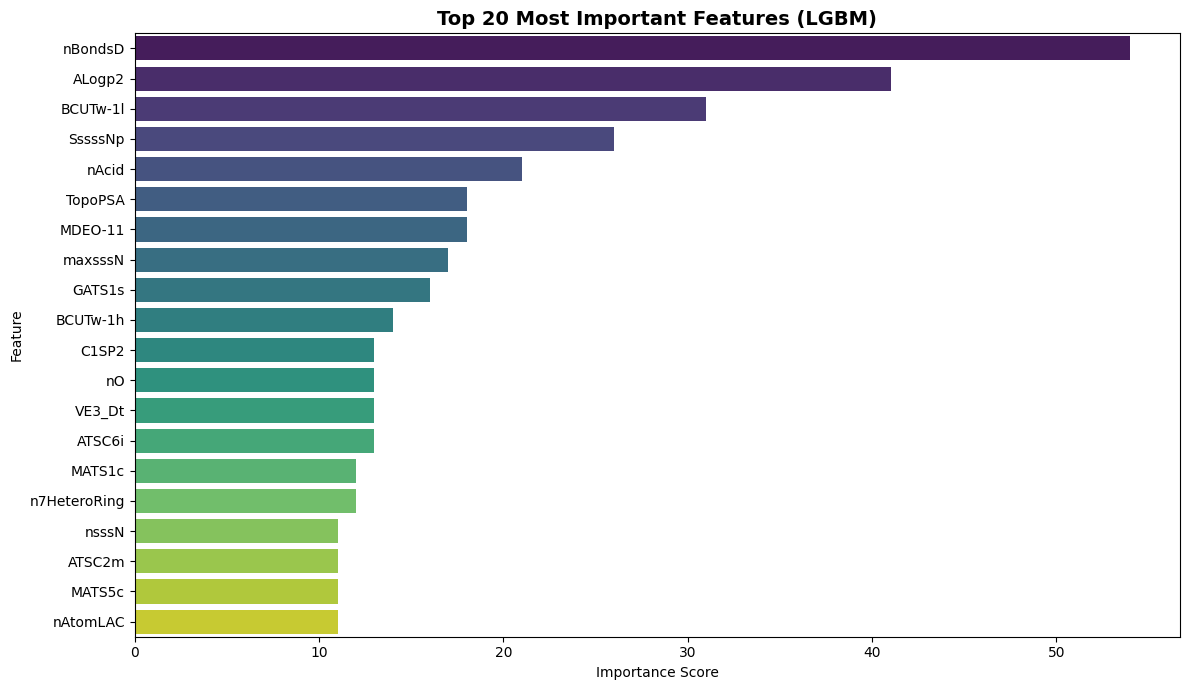


  Top 5 features for LGBM:
      Feature  Importance
470   nBondsD          54
2      ALogp2          41
459  BCUTw-1l          31
847   SssssNp          26
0       nAcid          21


In [34]:
try:
    from sklearn.inspection import permutation_importance
    
    print('\n' + '='*80)
    print('FEATURE IMPORTANCE ANALYSIS')
    print('='*80)
    
    feature_names = X_train.columns
    
    # Sample data for faster permutation importance computation
    X_sample, _, y_sample, _ = train_test_split(
        X_train, y_train, train_size=0.3, random_state=42, stratify=y_train
    )
    
    print(f'\nComputing feature importance using sample data ({X_sample.shape[0]} samples)...')
    
    # Dictionary to store importance results
    importance_results = {}
    
    # Models to analyze
    models_to_analyze = ['RF', 'LR', 'ET', 'LGBM']

    for model_name in models_to_analyze:
        try:
            if model_name not in padel_saved_models:
                print(f'Skipping {model_name} - not in trained models')
                continue
                
            model = padel_saved_models[model_name]
            print(f'\nAnalyzing {model_name}...')
            
            if hasattr(model, 'feature_importances_'):
                # For tree-based models (RF, XGB, ET) - FAST
                print(f'  Using built-in feature importance')
                importances = model.feature_importances_
                
            elif hasattr(model, 'coef_'):
                # For linear models (LR) - Use absolute coefficients
                print(f'  Using absolute coefficient values')
                importances = np.abs(model.coef_[0])
                
            else:
                # For other models (KNN, SVM) - Use permutation importance
                print(f'  Computing permutation importance (this may take ~1-2 min)...')
                perm_importance = permutation_importance(
                    model, X_sample, y_sample, 
                    n_repeats=5,
                    random_state=42,
                    n_jobs=-1
                )
                importances = perm_importance.importances_mean
            
            # Create DataFrame and get top 20 features
            ft_importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            }).sort_values(by='Importance', ascending=False).head(20)
            
            importance_results[model_name] = ft_importance_df
            
            # Plotting
            plt.figure(figsize=(12, 7))
            sns.barplot(x='Importance', y='Feature', data=ft_importance_df, palette='viridis')
            plt.title(f'Top 20 Most Important Features ({model_name})', fontsize=14, fontweight='bold')
            plt.xlabel('Importance Score')
            plt.ylabel('Feature')
            plt.tight_layout()
            plt.savefig(f'../figures/padel_{model_name}_feature_importance.png', dpi=300, bbox_inches='tight')
            plt.show()
            
            print(f'\n  Top 5 features for {model_name}:')
            print(ft_importance_df.head(5).to_string())
            
        except Exception as e:
            print(f'Error analyzing {model_name}: {e}')
            continue
    
except Exception as e:
    print(f'Error in feature importance analysis: {e}')

In [13]:

### Training and Evaluating XGBoost Model on PaDEL Descriptors


from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define a small parameter grid for XGBoost (optimized for speed)
xgb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# Instantiate the XGBClassifier
xgb_model = XGBClassifier(r
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='hist',  # Fastest for CPU, works on M1
    n_jobs=1  # Single-threaded for MacBook Air M1
)

# Run GridSearchCV
print("Running GridSearchCV for XGBoost...")
xgb_gs = GridSearchCV(
    xgb_model,
    xgb_param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Single-threaded
)
xgb_gs.fit(X_train, y_train)
print("Best XGBoost params:", xgb_gs.best_params_)
print("Best XGBoost CV Accuracy: %.4f" % xgb_gs.best_score_)

# Retrain on full training set
xgb_best = xgb_gs.best_estimator_
xgb_best.fit(X_train, y_train)

# Save the model
joblib.dump(xgb_best, '../output/models/padel_XGB_model.pkl')

# Evaluate on test set
y_pred = xgb_best.predict(X_test)
if hasattr(xgb_best, 'predict_proba'):
    y_proba = xgb_best.predict_proba(X_test)[:, 1]
else:
    y_proba = [0] * len(y_test)
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

xgb_test_metrics = {
    'Model': 'XGB',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'Specificity': specificity,
    'F1 Score': f1_score(y_test, y_pred),
    'roc_auc': roc_auc_score(y_test, y_proba)
}
print("XGBoost Test Set Metrics:")
for k, v in xgb_test_metrics.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

# Optionally, append to test_results_df for comparison with other models
try:
    test_results_df = test_results_df.append(xgb_test_metrics, ignore_index=True)
    display(test_results_df)
except Exception as e:
    print("Could not append to test_results_df:", e)


Running GridSearchCV for XGBoost...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best XGBoost params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best XGBoost CV Accuracy: 0.9249
XGBoost Test Set Metrics:
Model: XGB
Accuracy: 0.9360
Precision: 0.9327
Recall: 0.9398
Specificity: 0.9322
F1 Score: 0.9362
roc_auc: 0.9802
Could not append to test_results_df: name 'test_results_df' is not defined
